## Spring-boot analysis

In [ ]:
import importlib
import utils2

importlib.reload(utils2)
from utils2 import get_all_data_from_one_repo

data_spring_boot = get_all_data_from_one_repo("spring-boot", 25, excluded_words="testsupport|Test")

-------------------------------------
Aggregation of the JoularNodeEntities
-------------------------------------


KeyboardInterrupt: 

### Boxplot of the normal distributions without outliers

#### Highest distributions

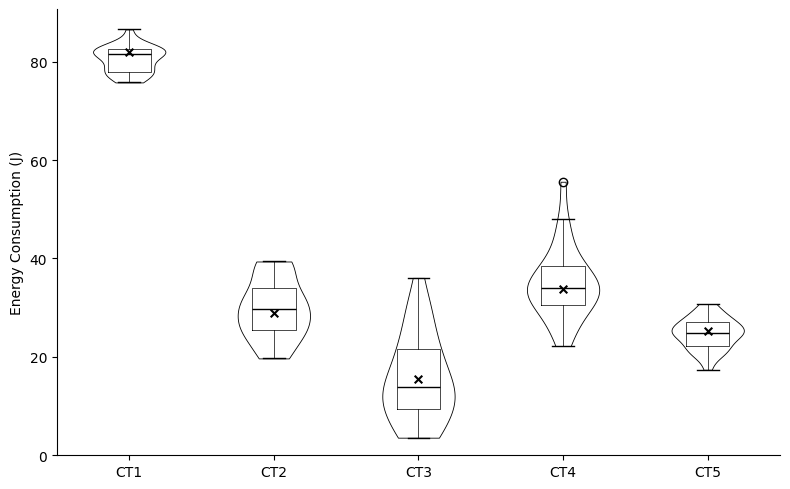

In [ ]:
highest_spring = data_spring_boot.filter_highest(percentage=17)
highest_spring.plot_quantiles(highest=True, save=False, begin_label=1)

#### Lowest distributions

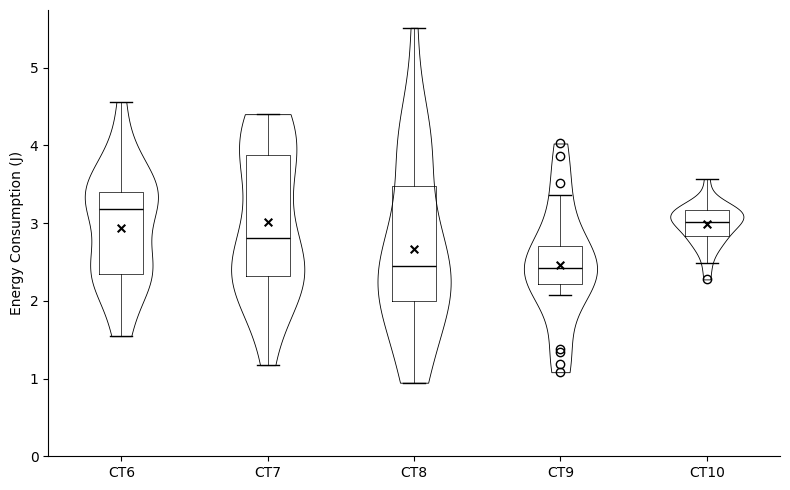

In [ ]:
lowest_spring = data_spring_boot.filter_lowest(17)
lowest_spring.plot_quantiles(highest=False, save=True, begin_label=6)

In [ ]:
for trace in highest_spring.call_traces:
    print(f"{trace.label}, Median: {round(trace.median, 2)}, Mean: {round(trace.mean, 2)}, Std dev: {round(trace.std_dev, 2)}")

for trace in lowest_spring.call_traces:
    print(f"{trace.label}, Median: {round(trace.median, 2)}, Mean: {round(trace.mean, 2)}, Std dev: {round(trace.std_dev, 2)}")

CT1, Median: 81.54, Mean: 82.01, Std dev: 6.29
CT2, Median: 29.48, Mean: 28.84, Std dev: 7.24
CT3, Median: 13.81, Mean: 15.58, Std dev: 8.63
CT4, Median: 33.76, Mean: 33.86, Std dev: 8.67
CT5, Median: 25.08, Mean: 25.2, Std dev: 3.68
CT6, Median: 3.19, Mean: 2.93, Std dev: 0.72
CT7, Median: 2.8, Mean: 3.02, Std dev: 0.93
CT8, Median: 2.45, Mean: 2.67, Std dev: 1.11
CT9, Median: 2.42, Mean: 2.46, Std dev: 0.73
CT10, Median: 3.02, Mean: 2.98, Std dev: 0.26


## Spoon analysis

In [ ]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import get_all_data_from_one_repo

data_spoon = get_all_data_from_one_repo("spoon", 25, excluded_first_ancestor_class=" ")

-------------------------------------
Aggregation of the JoularNodeEntities
-------------------------------------
Number of documents : 43

---------------
Remove outliers
---------------
Len without outliers (with at least 25 values) :  40

-----------------
Shapiro-Wilk test
-----------------
Number of normal distributions :  31



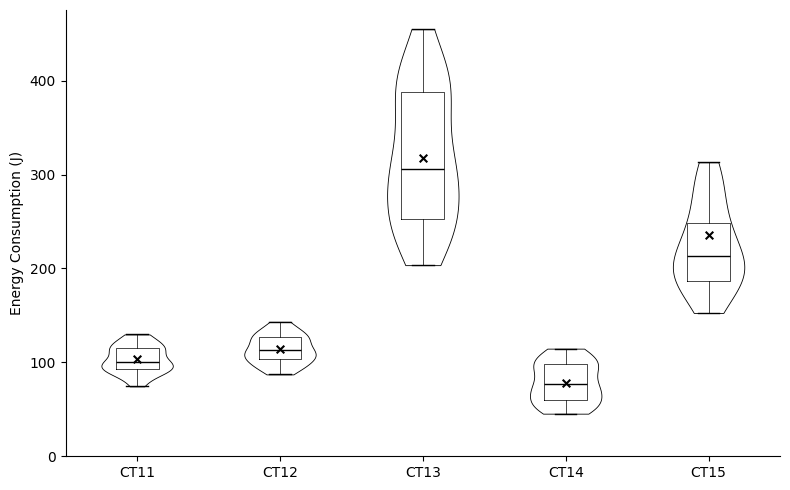

In [ ]:
highest_spoon = data_spoon.filter_highest(15)
highest_spoon.plot_quantiles(highest=True, save=False, begin_label=11)

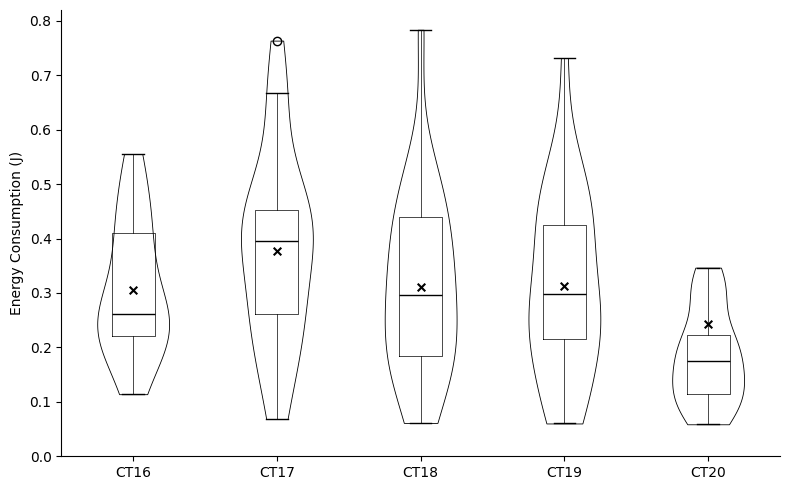

In [ ]:
lowest_spoon = data_spoon.filter_lowest(16)
lowest_spoon.plot_quantiles(highest=False, save=False, begin_label=16)

In [ ]:
def compute_mean(values:list):
    nb_elements = len(values)
    total = 0
    for value in values:
        total+= value
    return total/nb_elements

In [ ]:
import numpy as np

for trace in highest_spoon.call_traces:
    print(f"{trace.label}, Median: {round(trace.median, 2)}, Mean: {round(trace.mean, 2)}, Std dev: {round(trace.std_dev, 2)}")

for trace in lowest_spoon.call_traces:
    print(f"{trace.label}, Median: {round(trace.median, 2)}, Mean: {round(trace.mean, 2)}, Std dev: {round(trace.std_dev, 2)}")
    print(trace)
    print("computed mean = ", compute_mean(trace.values))
    print(np.mean(trace.values))
    print()

CT11, Median: 100.34, Mean: 103.54, Std dev: 14.33
CT12, Median: 112.91, Mean: 113.77, Std dev: 14.93
CT13, Median: 306.23, Mean: 318.07, Std dev: 70.24
CT14, Median: 76.52, Mean: 78.42, Std dev: 21.31
CT15, Median: 214.25, Mean: 236.01, Std dev: 85.55
CT16, Median: 0.26, Mean: 0.31, Std dev: 0.12
CallTrace(class_method_signature='spoon.reflect.path.CtRole.toString', line_number=187, median=0.26159998774528503, mean=0.3051482724218533, values=[0.26159998774528503, 0.42730000615119934, 0.5170999765396118, 0.23559999465942383, 0.2531999945640564, 0.5271999835968018, 0.17350000143051147, 0.4359999895095825, 0.4350000023841858, 0.33559998869895935, 0.4101000130176544, 0.555400013923645, 0.2572999894618988, 0.3001999855041504, 0.3434999883174896, 0.2761000096797943, 0.3321000039577484, 0.1898999959230423, 0.2126999944448471, 0.21209999918937683, 0.11410000175237656, 0.22789999842643738, 0.15410000085830688, 0.12549999356269836, 0.22089999914169312, 0.24869999289512634, 0.46639999747276306, 

### Fanout analysis

In [ ]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import mean_dict, create_dataframe_metric_energy, scatter_plot

all_project_means = mean_dict(data_spoon)
df = create_dataframe_metric_energy(data_spoon, "spoon")
scatter_plot(df)

spoon.MavenLauncherTest.testForceRefresh 194
spoon.MavenLauncher.<init> 58
spoon.MavenLauncher.<init> 127
spoon.MavenLauncher.init 214

spoon.support.compiler.jdt.JDTImportBuilderTest.setup 62
spoon.support.compiler.jdt.JDTImportBuilderTest.setupMockFactories 155
spoon.reflect.factory.CompilationUnitFactory.getOrCreate 169

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 536
spoon.reflect.path.impl.CtPathImpl.evaluateOn 34
spoon.reflect.path.impl.CtRolePathElement.getElements 111
spoon.reflect.path.impl.CtRolePathElement.getFromSet 53
spoon.reflect.meta.impl.SetHandler$1.iterator 57
spoon.reflect.meta.impl.SetHandler.iterator 109

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 534
spoon.reflect.path.CtPathStringBuilder.fromString 75
spoon.reflect.path.CtPathStringBuilder$Tokenizer.getNextToken 170

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 534
spoon.reflect.path.CtPathStringBuilder.fromString 105
spoon.reflect.

## Hibernate-orm

In [ ]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import get_all_data_from_one_repo, mean_dict, create_dataframe_metric_energy

data_hibernate = get_all_data_from_one_repo("hibernate-orm", 25, excluded_first_ancestor_class=" ")

all_project_means = mean_dict(data_hibernate)
df = create_dataframe_metric_energy(data_hibernate, "hibernate-orm")
scatter_plot(df)

-------------------------------------
Aggregation of the JoularNodeEntities
-------------------------------------
Number of documents : 104

---------------
Remove outliers
---------------
Len without outliers (with at least 25 values) :  66

-----------------
Shapiro-Wilk test
-----------------
Number of normal distributions :  36

org.hibernate.testing.orm.junit.DomainModelExtension.postProcessTestInstance 112
org.hibernate.testing.orm.junit.DomainModelExtension.createDomainModelScope 238
org.hibernate.testing.orm.junit.DomainModelExtension$DomainModelScopeImpl.<init> 318
org.hibernate.testing.orm.junit.DomainModelExtension$DomainModelScopeImpl.createDomainModel 325
org.hibernate.testing.orm.junit.DomainModelExtension.lambda$createDomainModelScope$0 204
org.hibernate.boot.MetadataSources.addResource 331
org.hibernate.boot.jaxb.internal.UrlXmlSource.doBind 38
org.hibernate.boot.jaxb.internal.InputStreamXmlSource.doBind 43
org.hibernate.boot.jaxb.internal.AbstractBinder.bind 49
org.hib